In [1]:
import torch
import torch.nn as nn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import glob

import pandas as pd

In [16]:
save_folder = "/home/fpt/moeut_training_code/paper/deepseek/router_saturation/smoe_shared"
router_info_list_path = glob.glob(os.path.join(save_folder, "*.npy"))
router_info_final_path = os.path.join(save_folder, "model-100000.npy")

# load all checkpoint information in the router_info_list_path
router_info_dict = {}
for path in router_info_list_path:
    router_info = np.load(path)
    router_info_dict[path] = router_info

# sort the router_info_dict by the number in key name
router_info_dict = sorted(router_info_dict.items(), key=lambda x: int(x[0].split("-")[-1].split(".")[0]))
router_info_dict = dict(router_info_dict)

In [17]:
def compute_entropy(router_info):
    n_layer = router_info.shape[0]
    router_infos = {}
    for layer in range(n_layer):
        router_info_layer = router_info[layer]  # num_tokens x num_experts (8000, 66)
        # print(router_info_layer.shape)
        
        total_entropy = 0
        for i in range(router_info_layer.shape[0]):  # num_tokens
            if np.sum(router_info_layer[i]) == 0 or np.isnan(np.sum(router_info_layer[i])):
                entropy = 0
            else:
                entropy = -np.sum(router_info_layer[i] * np.log(router_info_layer[i] + 1e-10))  # 1
                total_entropy += entropy
        total_entropy /= router_info_layer.shape[0]
        router_infos[layer] = total_entropy
    return router_infos

In [18]:
model_router_saturation_info = {}

for model_name, model_info in router_info_dict.items():
    count_match = compute_entropy(model_info)
    model_router_saturation_info[model_name] = count_match

In [19]:
model_router_saturation_info

{'/home/fpt/moeut_training_code/paper/deepseek/router_saturation/smoe_shared/model-10000.npy': {0: np.float64(1.7674550239645432),
  1: np.float64(1.7514548884415162),
  2: np.float64(1.7407095009143045),
  3: np.float64(1.7409030321809162),
  4: np.float64(1.7402562510670898),
  5: np.float64(1.7297543648034477),
  6: np.float64(1.7309331431679127),
  7: np.float64(1.7300947168023282),
  8: np.float64(1.7305881321892085),
  9: np.float64(1.7290376288389016),
  10: np.float64(1.7274207411219162),
  11: np.float64(1.7301314548761517),
  12: np.float64(1.7279446408239065),
  13: np.float64(1.7276680173603378),
  14: np.float64(1.7287707631194262),
  15: np.float64(1.7251512363019303)},
 '/home/fpt/moeut_training_code/paper/deepseek/router_saturation/smoe_shared/model-20000.npy': {0: np.float64(1.7677032228874128),
  1: np.float64(1.7525226895880506),
  2: np.float64(1.7406451176561566),
  3: np.float64(1.741953724549689),
  4: np.float64(1.7416486901487018),
  5: np.float64(1.72984034205

In [20]:
# convert the model_router_saturation_info to pandas dataframe with column name is the number in the key name
model_router_saturation_info_df = pd.DataFrame(model_router_saturation_info)

# make the column name is the number in the key name
model_router_saturation_info_df.columns = [col.split("-")[-1].split(".")[0] for col in model_router_saturation_info_df.columns]
model_router_saturation_info_df.to_csv("model_router_saturation_info-smoe.csv", index=False)
model_router_saturation_info_df

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,1.767455,1.767703,1.767384,1.766540,1.765918,1.764954,1.764277,1.764239,1.764228,1.763885
1,1.751455,1.752523,1.752369,1.752525,1.752722,1.752911,1.752707,1.752842,1.753000,1.752974
2,1.740710,1.740645,1.740125,1.739638,1.739297,1.740018,1.740080,1.740097,1.740560,1.740541
3,1.740903,1.741954,1.741547,1.741951,1.742489,1.742812,1.742518,1.743011,1.743923,1.743746
4,1.740256,1.741649,1.742065,1.742480,1.742706,1.743595,1.743735,1.743641,1.744618,1.744417
5,1.729754,1.729840,1.729840,1.729981,1.730660,1.731005,1.730732,1.730948,1.731309,1.731393
6,1.730933,1.730582,1.729801,1.730302,1.730699,1.730358,1.730467,1.730846,1.730983,1.731013
7,1.730095,1.731267,1.731357,1.731401,1.732726,1.733283,1.732648,1.733083,1.733140,1.732168
8,1.730588,1.732057,1.732337,1.732204,1.732427,1.733053,1.732234,1.732083,1.732317,1.731948
9,1.729038,1.730470,1.730252,1.731193,1.732397,1.731848,1.729909,1.730248,1.730119,1.729204


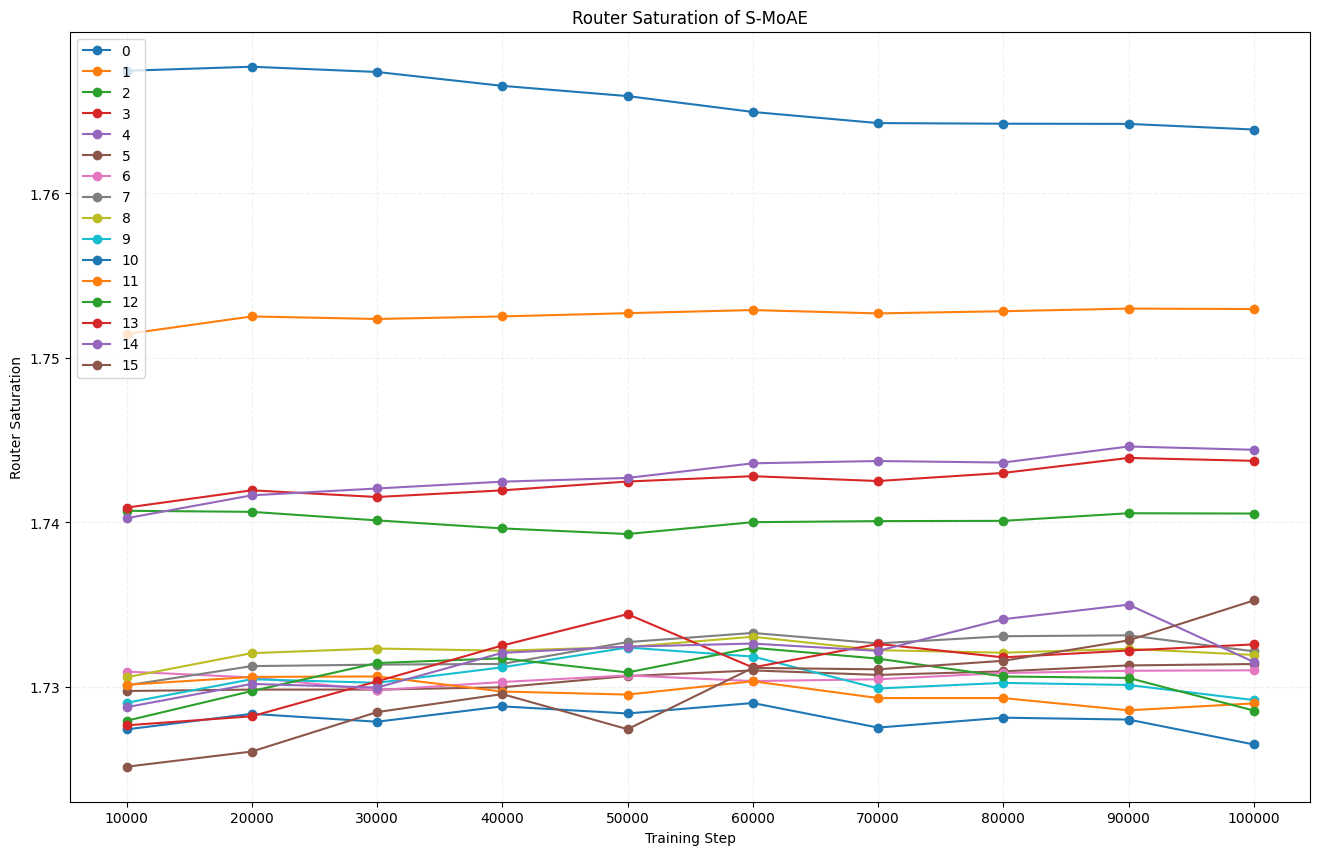

In [21]:
# create a figure to visualize the model_router_saturation_info_df
# the x axis is the training step, which is the column name of the model_router_saturation_info_df, the y axis is the layer_id, which is the row name of the model_router_saturation_info_df

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model_router_saturation_info_df.columns, model_router_saturation_info_df.values.transpose(), marker="o")

# add the legend
ax.legend(model_router_saturation_info_df.index, loc="upper left")

ax.set_xlabel("Training Step")
ax.set_ylabel("Router Saturation")
ax.set_title("Router Saturation of S-MoAE")
plt.grid(True, alpha=0.2, linestyle="--")
plt.show()

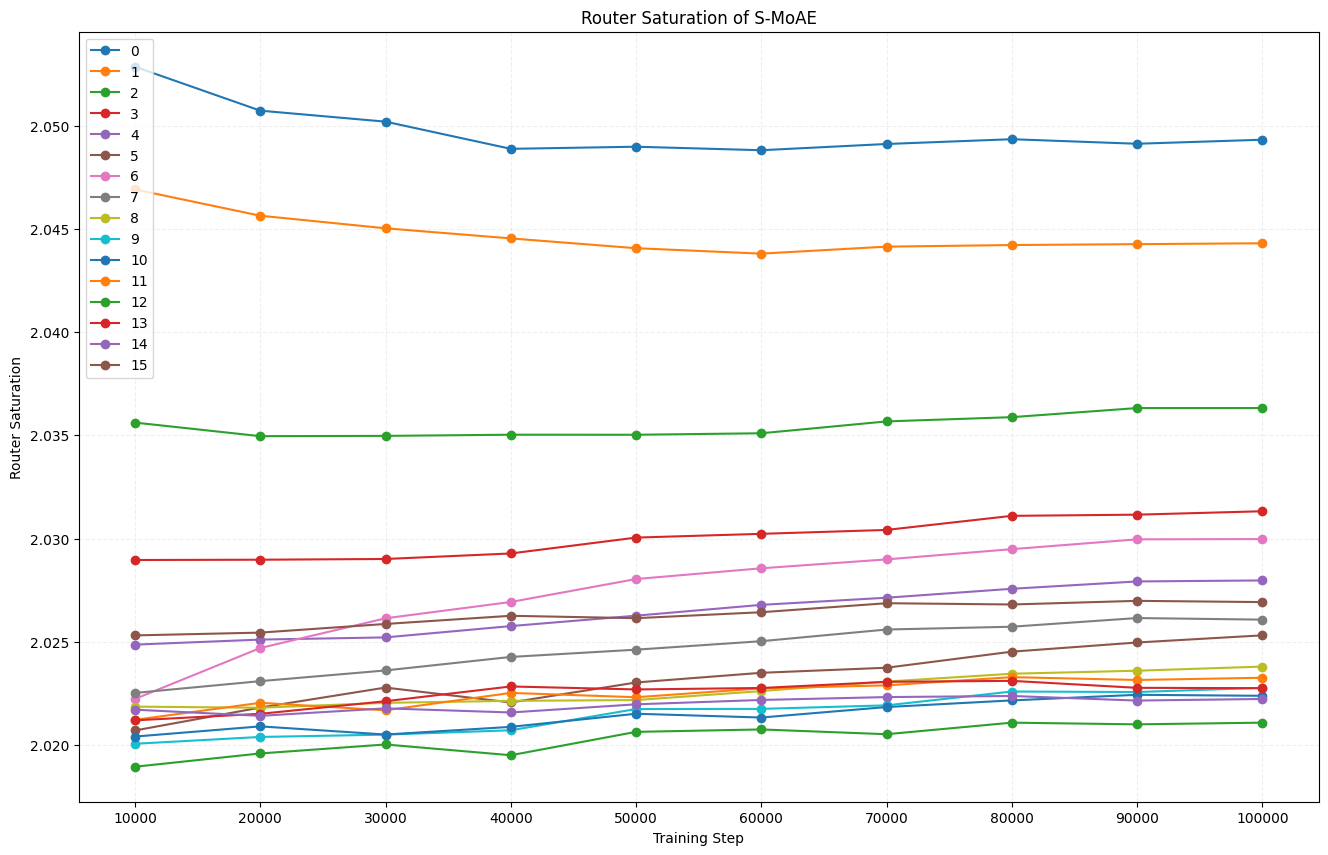

In [13]:
# create a figure to visualize the model_router_saturation_info_df
# the x axis is the training step, which is the column name of the model_router_saturation_info_df, the y axis is the layer_id, which is the row name of the model_router_saturation_info_df

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model_router_saturation_info_df.columns, model_router_saturation_info_df.values.transpose(), marker="o")

# add the legend
ax.legend(model_router_saturation_info_df.index, loc="upper left")

ax.set_xlabel("Training Step")
ax.set_ylabel("Router Saturation")
ax.set_title("Router Saturation of S-MoAE")
plt.grid(True, alpha=0.2, linestyle="--")
plt.show()

In [14]:
def match_stats(router_choose, router_final_choose):
    n_layer = router_choose.shape[0]
    count_match = {}
    for layer in range(n_layer):
        count_match[layer] = 0
        router_choose_layer = router_choose[layer]
        router_final_choose_layer = router_final_choose[layer]
        
        # compare the choose of router_10k and router_final based only on the 1 value
        for i in range(router_choose_layer.shape[0]):
            for j in range(router_choose_layer[i].shape[0]):
                if router_choose_layer[i][j] == 1 and router_final_choose_layer[i][j] == 1:
                    count_match[layer] += 1
    return count_match

In [32]:
model_router_saturation_info = {}

for model_name, model_info in router_info_dict.items():
    router_choose = (model_info > 0).astype(int)
    count_match = match_stats(router_choose, router_final_choose)
    count_match_ratio = {layer: count_match[layer] / router_final_choose[layer].sum() * 100 for layer in count_match}
    model_router_saturation_info[model_name] = count_match_ratio

In [1]:
# convert the model_router_saturation_info to pandas dataframe with column name is the number in the key name
model_router_saturation_info_df = pd.DataFrame(model_router_saturation_info)

# make the column name is the number in the key name
model_router_saturation_info_df.columns = [col.split("-")[-1].split(".")[0] for col in model_router_saturation_info_df.columns]
model_router_saturation_info_df.to_csv("model_router_saturation_info-smoe.csv", index=False)
model_router_saturation_info_df

NameError: name 'pd' is not defined

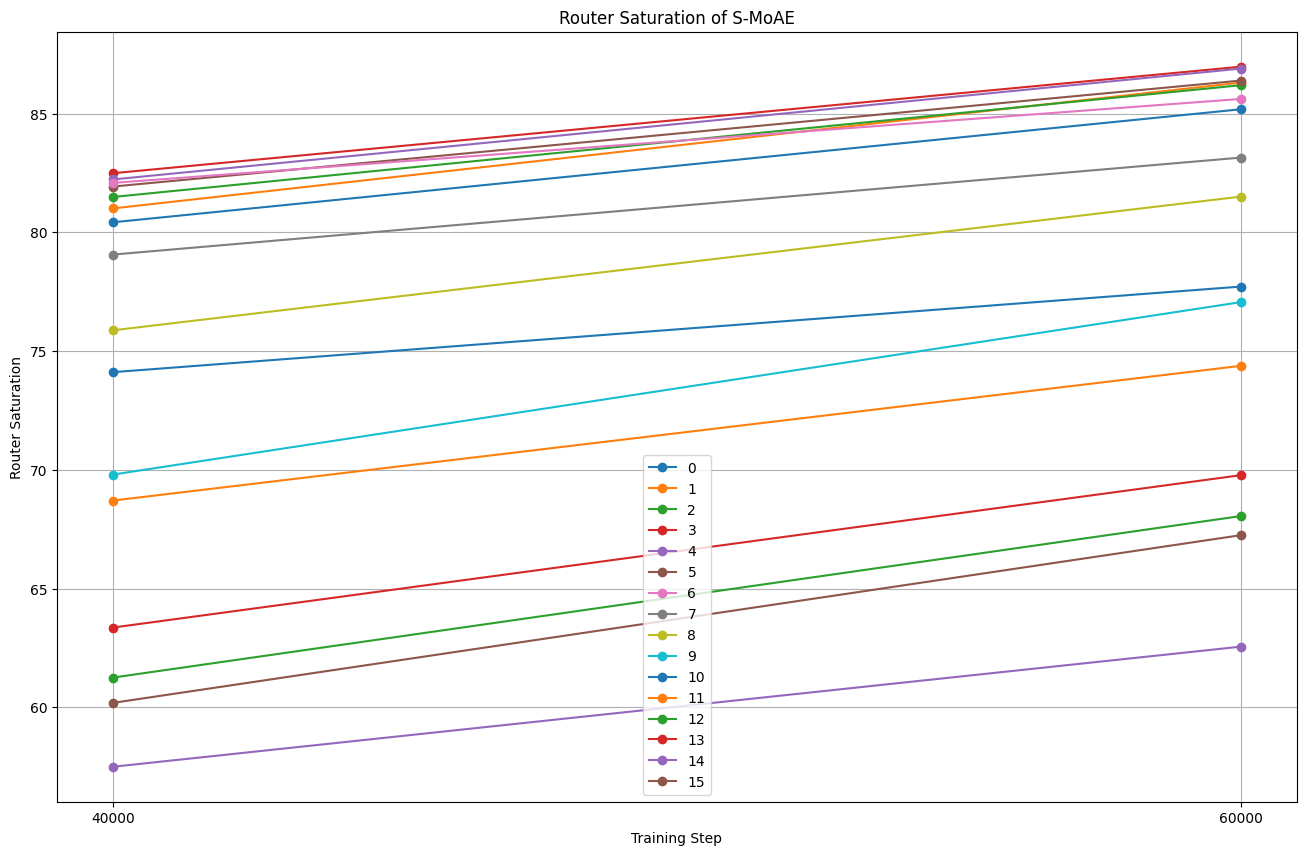

In [34]:
# create a figure to visualize the model_router_saturation_info_df
# the x axis is the training step, which is the column name of the model_router_saturation_info_df, the y axis is the layer_id, which is the row name of the model_router_saturation_info_df

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model_router_saturation_info_df.columns[:-1], model_router_saturation_info_df.values.transpose()[:-1], marker="o")

# add the legend
ax.legend(model_router_saturation_info_df.index)

ax.set_xlabel("Training Step")
ax.set_ylabel("Router Saturation")
ax.set_title("Router Saturation of S-MoAE")
plt.grid(True)
plt.show()

In [26]:
# convert the model_router_saturation_info to pandas dataframe with column name is the number in the key name
model_router_saturation_info_df = pd.DataFrame(model_router_saturation_info)

# make the column name is the number in the key name
model_router_saturation_info_df.columns = [col.split("-")[-1].split(".")[0] for col in model_router_saturation_info_df.columns]
model_router_saturation_info_df.to_csv("model_router_saturation_info-smoe.csv", index=False)
model_router_saturation_info_df

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,49.538146,49.866015,50.031526,49.818726,49.661097,85.660467,88.931274,91.762295,93.920240,100.0
1,47.375473,47.731715,47.559899,47.296658,47.643443,86.544767,88.992749,91.079760,93.061160,100.0
2,47.780580,48.242434,48.477301,48.322825,48.584489,88.286570,90.171816,91.926230,93.395334,100.0
3,47.301387,47.320303,47.375473,47.389660,47.274590,87.463745,89.465637,91.116015,92.402270,100.0
4,47.857818,48.024905,48.218789,48.083228,48.097415,87.756936,89.523960,91.164880,92.517339,100.0
5,49.732030,49.988966,50.411412,50.657314,50.870113,87.488966,89.257566,90.680958,91.986129,100.0
6,50.488651,50.857503,51.123897,51.366646,51.156999,86.930958,88.597100,90.129256,91.565259,100.0
7,51.609395,52.213115,52.526797,52.845208,53.084805,87.670240,89.301702,90.621059,91.990858,100.0
8,47.384931,48.396910,47.810530,48.412673,48.537201,87.646595,89.230769,90.565889,91.844262,100.0
9,53.477301,54.140921,54.804540,54.949559,55.217528,87.542560,89.008512,90.425599,91.751261,100.0


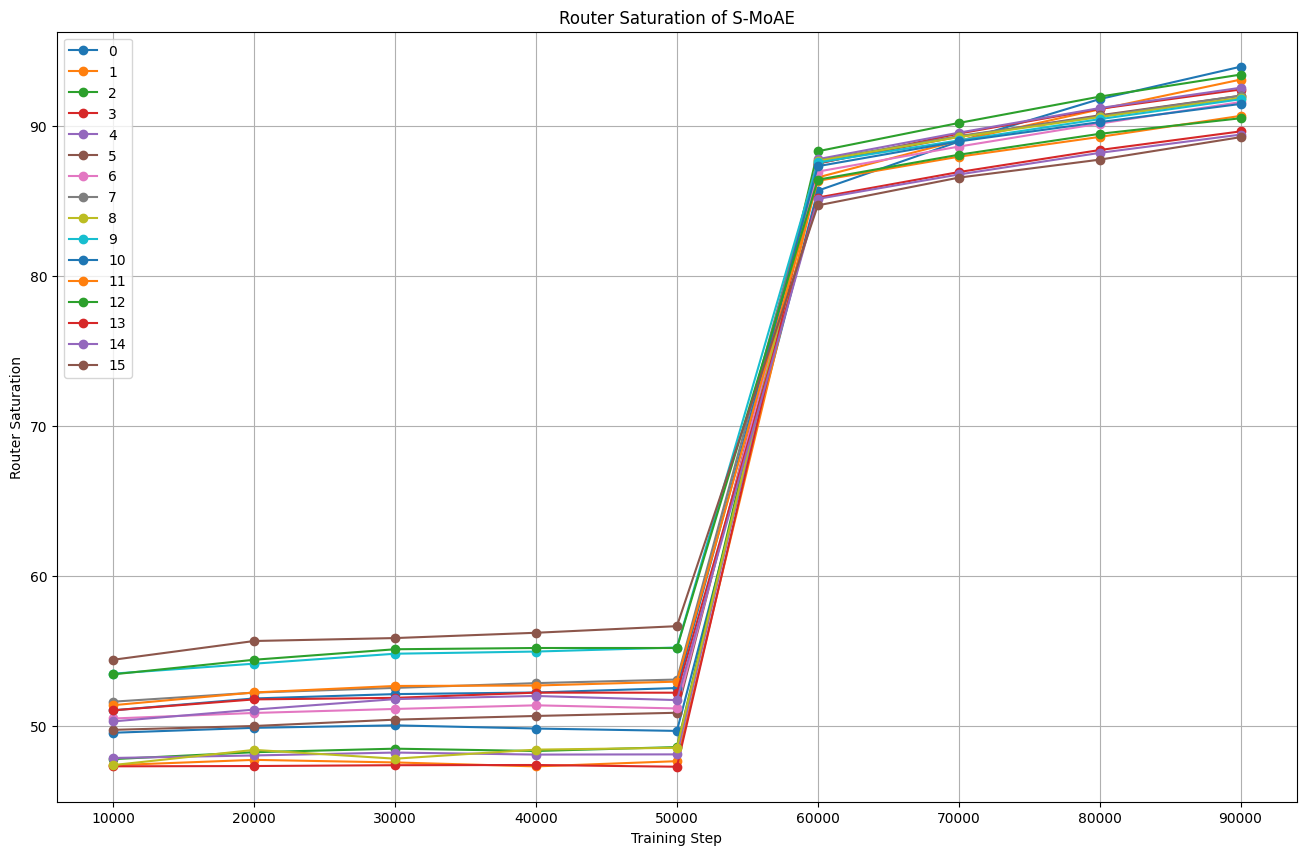

In [27]:
# create a figure to visualize the model_router_saturation_info_df
# the x axis is the training step, which is the column name of the model_router_saturation_info_df, the y axis is the layer_id, which is the row name of the model_router_saturation_info_df

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model_router_saturation_info_df.columns[:-1], model_router_saturation_info_df.values.transpose()[:-1], marker="o")

# add the legend
ax.legend(model_router_saturation_info_df.index)

ax.set_xlabel("Training Step")
ax.set_ylabel("Router Saturation")
ax.set_title("Router Saturation of S-MoAE")
plt.grid(True)
plt.show()

In [6]:
# convert the model_router_saturation_info to pandas dataframe with column name is the number in the key name
model_router_saturation_info_df = pd.DataFrame(model_router_saturation_info)

# make the column name is the number in the key name
model_router_saturation_info_df.columns = [col.split("-")[-1].split(".")[0] for col in model_router_saturation_info_df.columns]
model_router_saturation_info_df.to_csv("model_router_saturation_info-smoe.csv", index=False)
model_router_saturation_info_df

,10000,20000,30000,40000,50000,60000,70000,80000,90000,100000
0,56.199559,62.109079,67.676545,74.943253,80.751892,87.203657,90.384615,92.875158,94.656368,100.0
1,72.826293,78.461538,82.912989,85.933165,88.121059,90.414565,92.465322,93.718474,95.206494,100.0
2,75.286885,80.814943,84.010088,86.891551,88.661728,90.639975,92.159521,93.447352,94.519231,100.0
3,73.108449,79.727301,83.720050,86.599937,88.562421,90.334174,91.844262,93.051702,94.011665,100.0
4,72.288777,78.530895,82.113808,85.360971,87.384931,89.481400,90.879571,92.009773,93.450504,100.0
5,68.513556,75.297919,80.104035,82.654477,85.852774,88.209332,90.397226,91.569987,92.930328,100.0
6,70.441362,77.892497,82.637137,85.294767,87.528373,89.498739,91.000946,92.186318,93.237705,100.0
7,71.910467,77.857818,81.836381,84.561791,86.875788,88.385876,90.219105,91.604666,92.779004,100.0
8,69.859710,76.278373,79.921185,82.712799,85.182850,87.343947,88.942308,90.226986,91.368222,100.0
9,70.587957,75.982030,80.067781,83.143127,85.465006,87.195776,88.756305,90.192308,91.294136,100.0


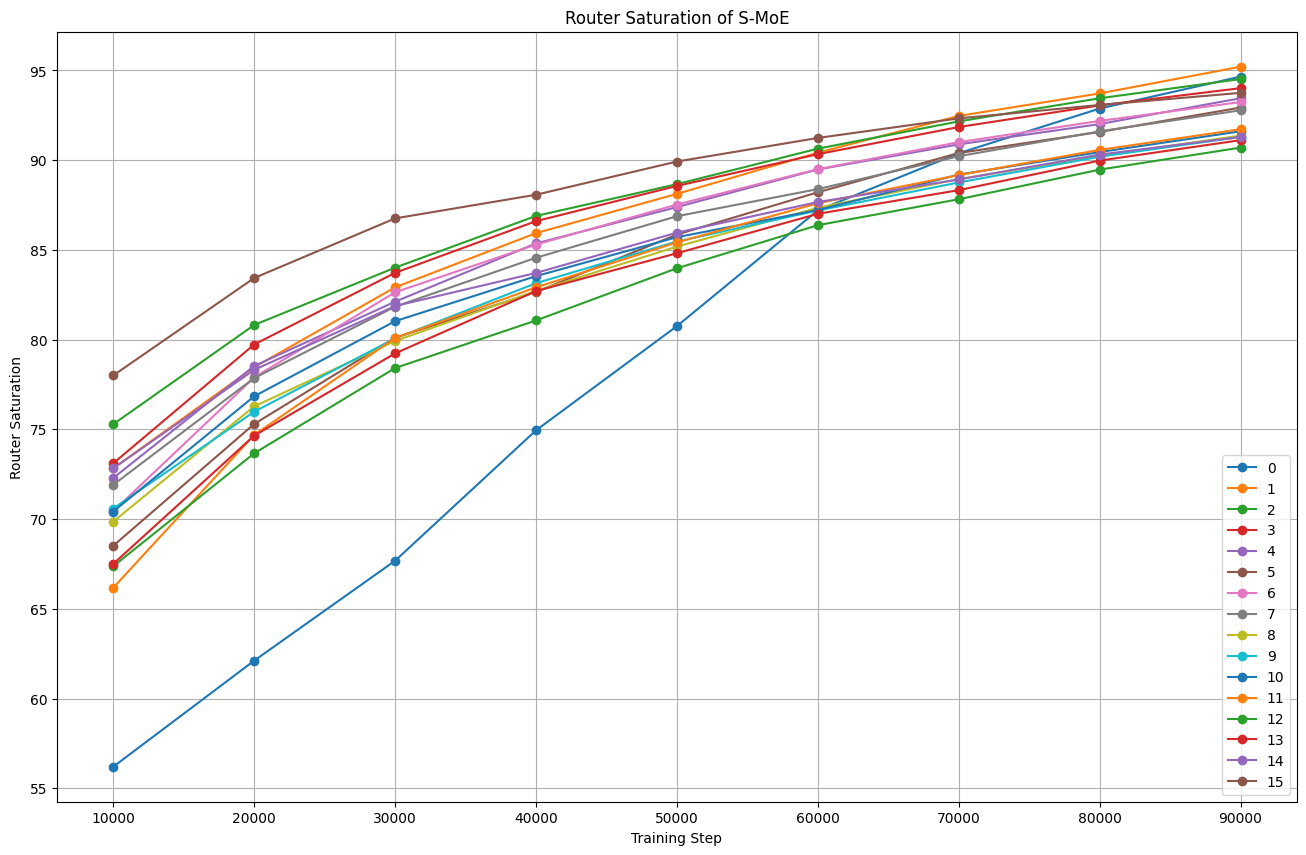

In [13]:
# create a figure to visualize the model_router_saturation_info_df
# the x axis is the training step, which is the column name of the model_router_saturation_info_df, the y axis is the layer_id, which is the row name of the model_router_saturation_info_df

fig = plt.figure(figsize=(16, 10))
ax = fig.add_subplot(1, 1, 1)
ax.plot(model_router_saturation_info_df.columns[:-1], model_router_saturation_info_df.values.transpose()[:-1], marker="o")

# add the legend
ax.legend(model_router_saturation_info_df.index)

ax.set_xlabel("Training Step")
ax.set_ylabel("Router Saturation")
ax.set_title("Router Saturation of S-MoAE")
plt.grid(True)
plt.show()
